# Adaptive Boosting (AdaBoost)

## Algorithmus
__Drei Grundideen:__
- AdaBoost kombiniert Weak Learner ("Stumps", Decision Tree mit Tiefe 1)
- AdaBoost gewichtet Ensemble Models
- Neue Stumps werden in Abhängigkeit von vorheringen Stumps gebildet

__Iteriere:__
- Gib allen *n* Instanzen ein gleiches Gewicht 1/*n*
- Trainiere einen Decision Tree mit der Tiefe 1 (Stumpf)
- Total Error ermitteln: Summme: Fehlklassifizierung * Gewicht (Total Error Intervall: 0-1)
- Ermittlere das Vote Gewicht (Relevanz) des Stumpfes mit 1/2 * log ((1-Total Error) / Total Error))
- Passe die Gewichte der Instanzen an
  - Gewicht für inkorrekt klassifizierte Instanzen erhöhen: weight = weight * e^Vote Gewicht des letzen Stumpfes
  - Gewicht für korrekt klassifizierte Instanzen verringern: weight = weight * e^-Vote Gewicht des letzen Stumpfes
  - Gewichte normalisieren (teile jedes Gewicht durch Summe der Gewichte)
- Generiere einen neuen Datensatz (sample mit Gewichten der Instanzen)
 

## Imports

In [29]:
from sklearn.ensemble import AdaBoostRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Datengrundlage

In [26]:
data = pd.read_csv("/data/mpg.csv")
x_train, x_test, y_train, y_test = train_test_split(data.drop(["mpg"],axis=1),data["mpg"])
train = pd.concat([x_train,y_train],axis=1)
test = pd.concat([x_test,y_test],axis=1)

## Boosting Modell trainieren

In [41]:
adaboost = AdaBoostRegressor()
adaboost.fit(x_train, y_train)
mse_tree = mean_squared_error(adaboost.predict(x_test),y_test)

## Leistungsfähigkeit visualisieren

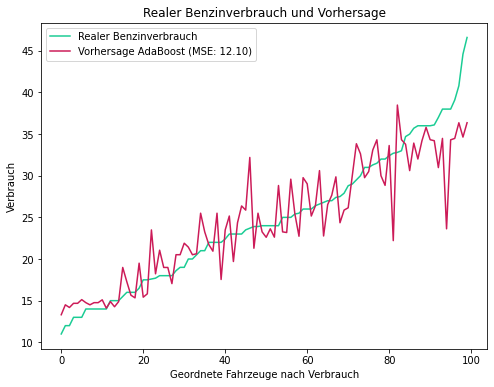

In [42]:
plt.figure(figsize=(8,6))
plt.title("Realer Benzinverbrauch und Vorhersage")
plt.plot(range(0,len(test)),test.sort_values("mpg")["mpg"],color="#1ACC94",label="Realer Benzinverbrauch")
plt.plot(range(0,len(test)),adaboost.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),color="#CC1B58",label="Vorhersage AdaBoost (MSE: {:.2f})".format(mse_tree))
plt.xlabel("Geordnete Fahrzeuge nach Verbrauch")
plt.ylabel("Verbrauch")
plt.legend()
plt.show()